##**Predicting Heart Failure from Health Records**
#####**Amulya, Breanna, Dhvani, Siri**
###### Dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.datasets import make_classification




**Preparing the Data**

In [ ]:
# Load dataset
url = "https://drive.google.com/uc?id=1oWGAdeeG_5vT9Qa-XpnQ0LXDpp0gWH05"

df = pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

#####**Perform PCA**

In [ ]:
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Covariance Matrix:\n", pca.get_covariance(), '\n')
print('\nEigenvalues:', pca.explained_variance_)

Covariance Matrix:
 [[ 9.74609138e-01  7.07635362e-02 -1.44990999e-02 -9.62530877e-02
  -1.02421896e-02  1.32470250e-01 -2.45287471e-02  1.36072823e-01
  -6.14729399e-02  3.08562131e-02 -1.03722773e-02 -2.39308095e-01]
 [ 7.07635362e-02  9.81524808e-01 -1.54517593e-01 -1.00083787e-02
   2.81146489e-02  1.21555863e-01 -7.95420948e-02  1.98172103e-02
   3.30900979e-02 -1.02646320e-01 -1.41477104e-01 -1.15311665e-01]
 [-1.44990999e-02 -1.54517593e-01  9.68446506e-01 -9.12129634e-02
   4.14774843e-02 -1.16454230e-01 -1.28204936e-04  4.95075241e-02
   4.43973542e-02  6.38164086e-02  7.52960750e-02  5.68121235e-02]
 [-9.62530877e-02 -1.00083787e-02 -9.12129634e-02  9.85646949e-01
  -1.62057657e-02 -3.33586913e-02  1.04812319e-01 -2.49862130e-03
  -1.11183416e-01 -1.75562429e-01 -1.51607206e-01  8.77209094e-02]
 [-1.02421896e-02  2.81146489e-02  4.14774843e-02 -1.62057657e-02
   9.18328009e-01  5.84367152e-02  8.97015111e-02 -4.89829384e-02
   1.71854776e-01 -1.48326203e-01 -1.12829437e-01  1

#####**Explained Variance Ratio**

In [ ]:
print("Explained Variance Ratios:", pca.explained_variance_ratio_, '\n')

total_explained_variances = []
for i in range(len(pca.explained_variance_ratio_)):
  total_explained_variances.append(sum(pca.explained_variance_ratio_[:i + 1]))
  print('Total explained variance including', i + 1, 'components:', total_explained_variances[-1])
  print('We', 'should use more components' if total_explained_variances[-1] < 0.9 else 'do not need to use more components.', '\n')

Explained Variance Ratios: [0.1416262  0.12915241 0.11090612 0.09292451 0.08648043] 

Total explained variance including 1 components: 0.14162620411162877
We should use more components 

Total explained variance including 2 components: 0.27077860978741713
We should use more components 

Total explained variance including 3 components: 0.38168472852290264
We should use more components 

Total explained variance including 4 components: 0.47460924306095964
We should use more components 

Total explained variance including 5 components: 0.5610896727404886
We should use more components 



#####**Scree Plot**

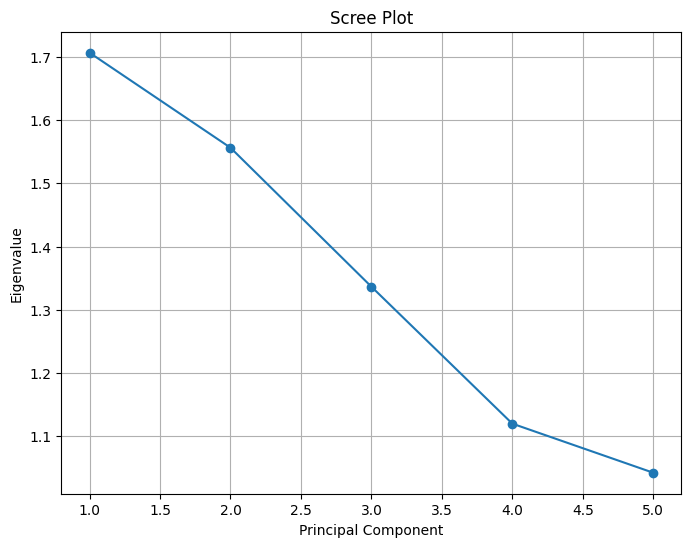

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')

plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

plt.grid()
plt.show()

###**Logistic Regression**

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)

y_pred = log_model.predict(X_test_pca)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

## in the format of:
## TP  FP
## FN  TN


Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        35
           1       1.00      0.36      0.53        25

    accuracy                           0.73        60
   macro avg       0.84      0.68      0.67        60
weighted avg       0.82      0.73      0.70        60


Confusion Matrix:
 [[35  0]
 [16  9]]
